In [17]:
import pandas as pd

In [18]:
dataset=pd.read_csv('/content/stock_data.csv')

In [19]:
dataset.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [20]:
dataset.shape

(5791, 2)

In [21]:
dataset.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [22]:
count=0
for value in dataset['Sentiment']:
    if value==-1:
        count=count+1
print(count)

2106


In [23]:
count=0
for value in dataset['Sentiment']:
    if value==1:
        count=count+1
print(count)

3685


In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [27]:
tokenizer.fit_on_texts(dataset['Text'])

In [28]:
train_x = pad_sequences(tokenizer.texts_to_sequences(dataset['Text']),padding='pre', maxlen=50)
print(train_x)

[[ 0  0  0 ... 80  1  1]
 [ 0  0  0 ...  2  1  1]
 [ 0  0  0 ... 31  4  1]
 ...
 [ 0  0  0 ... 12 13  1]
 [ 0  0  0 ... 12 13  1]
 [ 0  0  0 ... 12 13  1]]


In [29]:
y=dataset['Sentiment']

In [30]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5786   -1
5787   -1
5788    1
5789    1
5790    1
Name: Sentiment, Length: 5791, dtype: int64


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 300, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(8)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
hostory=model.fit(train_x,y,epochs=50)

Epoch 1/50
181/181 [==============================] - 45s 149ms/step - loss: 0.5135 - accuracy: 0.1207
Epoch 2/50
181/181 [==============================] - 27s 148ms/step - loss: 0.2971 - accuracy: 0.2910
Epoch 3/50
181/181 [==============================] - 27s 149ms/step - loss: 0.0535 - accuracy: 0.3022
Epoch 4/50
181/181 [==============================] - 27s 149ms/step - loss: -0.1916 - accuracy: 0.3155
Epoch 5/50
181/181 [==============================] - 27s 148ms/step - loss: -0.4201 - accuracy: 0.3245
Epoch 6/50
181/181 [==============================] - 27s 148ms/step - loss: -0.6655 - accuracy: 0.3281
Epoch 7/50
181/181 [==============================] - 27s 149ms/step - loss: -1.1057 - accuracy: 0.3148
Epoch 8/50
181/181 [==============================] - 27s 149ms/step - loss: -1.6177 - accuracy: 0.3407
Epoch 9/50
181/181 [==============================] - 27s 149ms/step - loss: -2.3433 - accuracy: 0.3391
Epoch 10/50
181/181 [==============================] - 27s 150ms/st

KeyError: ignored

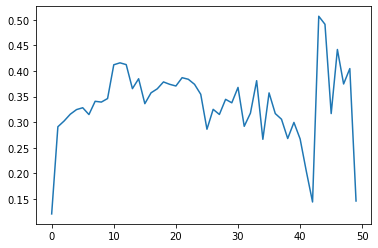

In [33]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(hostory, 'accuracy')

KeyError: ignored

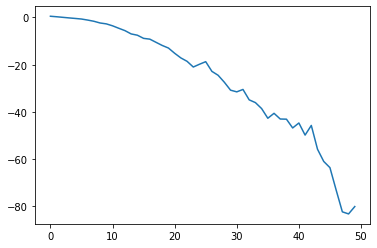

In [34]:
plot_graphs(hostory, 'loss')

In [36]:
test=["this time market seems to be good",
      "i cannot say anything this time it may be good may be bad",
      "my money died its lost",
      "i became billionaire yeah",
      "i got profit",
      ]







In [37]:
tokenizer1 = Tokenizer(num_words = 50, oov_token="<OOV>")
tokenizer1.fit_on_texts(test)

In [38]:
test_x = pad_sequences(tokenizer1.texts_to_sequences(test),padding='pre', maxlen=50)

In [39]:
print(test_x)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  5  8  9 10
   2  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  3 11 12 13  4  5 14  7  2  6  7
   2 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16 17 18
  19 20]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 21
  22 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
  24 25]]


In [40]:
result=model.predict(test_x)

In [41]:
print(result)

[[0.5114769 ]
 [0.        ]
 [0.        ]
 [0.48822108]
 [0.50391066]]


In [43]:
final=[]
for i in range(len(result)):
    if result[i] >=0.5:
        final.append(1)
    else:
        final.append(-1)

In [44]:
final

[1, -1, -1, -1, 1]

In [45]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://663fec1a-52b8-4fb9-a702-7bc6c98cf42f/assets


INFO:tensorflow:Assets written to: ram://663fec1a-52b8-4fb9-a702-7bc6c98cf42f/assets
